In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Source data location
source_file = 'source_data/housing_data_cleaned.csv'

In [3]:
# Read in source dataset - cleaned file after running 1_housing_etl.ipynb
housing_df = pd.read_csv(source_file,low_memory=False)
housing_df.head()

,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,...,topography,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning
0,D,ROW 3 STY MASONRY,Single Family,241.0,N,67.0,49200,0,4.0,0.0,...,F,938.00,1344.0,A,NaN,I,1895,Y,19144.0,RSA5
1,NaN,RES CONDO 3 STY MAS+OTH,Single Family,337.0,Y,0.0,45000,0,4.0,0.0,...,NaN,0.00,947.0,NaN,B307,I,1970,Y,19152.0,RM2
2,NaN,ROW 2 STY MASONRY,Single Family,201.0,NaN,70.0,0,0,4.0,0.0,...,F,1044.00,1190.0,NaN,NaN,I,1940,Y,19140.0,RM1
3,H,ROW B/GAR 2 STY MASONRY,Single Family,281.0,N,95.5,0,0,4.0,0.0,...,F,1686.53,1633.0,B,NaN,I,1940,Y,19141.0,RSA3
4,NaN,ROW 2 STY MASONRY,Single Family,293.0,NaN,112.5,0,0,4.0,0.0,...,F,2165.62,1320.0,B,NaN,I,1940,Y,19124.0,RSA5


## Total Livable Area vs Sale Price (Is Bigger Always Better)?

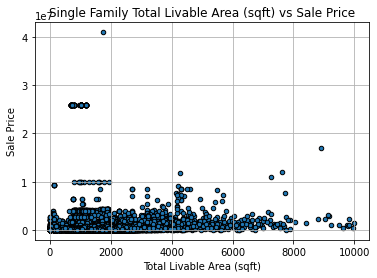

<Figure size 432x288 with 0 Axes>

In [5]:
# Create scatter plot for relationship between total liveable area and sale price

# Only analyze single family
single_family_df = housing_df.loc[(housing_df['category_code_description'] == 'Single Family') &
                                   (housing_df['total_livable_area'] <= 10000) ,:]

# 1.) Create figure and plot
livable_area_vs_price_single_scatter = single_family_df.plot.scatter(x='total_livable_area',y='sale_price',grid=True,edgecolors='black')
livable_area_vs_price_single_scatter.set_xlabel("Total Livable Area (sqft)")
livable_area_vs_price_single_scatter.set_ylabel("Sale Price")
livable_area_vs_price_single_scatter.set_title("Single Family Total Livable Area (sqft) vs Sale Price")

plt.show()
plt.tight_layout()



In [ ]:
# Regression/Correlation Analysis for Single Family

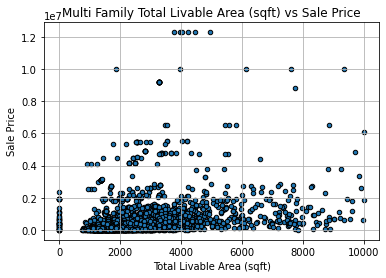

<Figure size 432x288 with 0 Axes>

In [6]:
# Create scatter plot for relationship between total liveable area and sale price

# Only analyze multi family
multi_family_df = housing_df.loc[(housing_df['category_code_description'] == 'Multi Family')&
                                 (housing_df['total_livable_area'] <= 10000),:]

# 1.) Create figure and plot
livable_area_vs_price_scatter_multi = multi_family_df.plot.scatter(x='total_livable_area',y='sale_price',grid=True,edgecolors='black')
livable_area_vs_price_scatter_multi.set_xlabel("Total Livable Area (sqft)")
livable_area_vs_price_scatter_multi.set_ylabel("Sale Price")
livable_area_vs_price_scatter_multi.set_title("Multi Family Total Livable Area (sqft) vs Sale Price")

plt.show()
plt.tight_layout()

In [ ]:
# Regression/Correlation Analysis for Multi Family

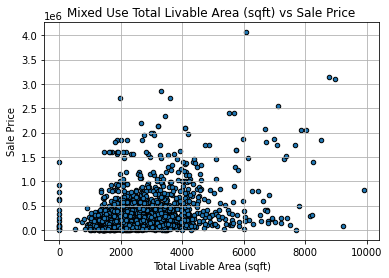

<Figure size 432x288 with 0 Axes>

In [7]:
# Create scatter plot for relationship between total liveable area and sale price

# Only analyze mixed use
mixed_use_df = housing_df.loc[(housing_df['category_code_description'] == 'Mixed Use')&
                               (housing_df['total_livable_area'] <= 10000),:]

# 1.) Create figure and plot
livable_area_vs_price_scatter_mixed = mixed_use_df.plot.scatter(x='total_livable_area',y='sale_price',grid=True,edgecolors='black')
livable_area_vs_price_scatter_mixed.set_xlabel("Total Livable Area (sqft)")
livable_area_vs_price_scatter_mixed.set_ylabel("Sale Price")
livable_area_vs_price_scatter_mixed.set_title("Mixed Use Total Livable Area (sqft) vs Sale Price")

plt.show()
plt.tight_layout()

In [ ]:
# Regression/Correlation Analysis for Mixed Use